In [1]:
import os
os.chdir("..")

import warnings
warnings.filterwarnings("ignore")

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp

import matplotlib.pyplot as plt

In [3]:
from lib import unet
from lib.data import *
from lib.models import *
from lib.train import *
from lib.simple_fcn import *

In [4]:
TRAIN = os.path.join("data", "train")
TRAIN_MSK = os.path.join("data", "train_mask")
VAL= os.path.join("data", "valid")
VAL_MSK = os.path.join("data", "valid_mask")

DEVICE = "cuda:0" if torch.cuda.is_available() else "cpu"

In [5]:
with open("notebooks/results.txt") as f:
    lines = f.readlines()

In [6]:
scores = []
for line in lines:
    if line[:5]=="valid":
        scores.append(float(line.split()[-4][:-1]))

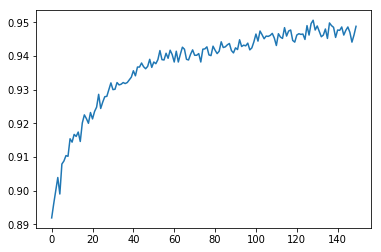

In [7]:
plt.plot(scores)

In [8]:
logs = {}

In [9]:
aug = load_augmentations(0.5, 0.1, 0.5, 0.8, 0.3, 0.8)

In [10]:
model = smp.Unet("resnet18")

In [11]:
optimizer = optim.Adam([
    {"params": model.encoder.parameters(), "lr" : 1e-6},
    {"params": model.decoder.parameters(), "lr" : 1e-4},
])

In [12]:
trainer = Trainer(model, "models/unet_resnet18_noaug.pth", 
                  TRAIN, TRAIN_MSK, 
                  VAL, VAL_MSK,
                  optimizer=optimizer,
                  device=DEVICE
                 )

In [13]:
results = trainer.fit(50, 8, 2)
logs["resnet18_noaug"] = results


Epoch: 0
valid: 100%|█████████████████| 100/100 [00:03<00:00, 32.83it/s, bce_dice_loss - 0.3153, iou - 0.8553, f-score - 0.9163]
Model saved!

Epoch: 1
valid: 100%|█████████████████| 100/100 [00:02<00:00, 34.44it/s, bce_dice_loss - 0.2532, iou - 0.8877, f-score - 0.9367]
Model saved!

Epoch: 2
valid: 100%|█████████████████| 100/100 [00:02<00:00, 34.27it/s, bce_dice_loss - 0.2084, iou - 0.9061, f-score - 0.9481]
Model saved!

Epoch: 3
valid: 100%|██████████████████| 100/100 [00:02<00:00, 34.22it/s, bce_dice_loss - 0.1983, iou - 0.9107, f-score - 0.951]
Model saved!

Epoch: 4
valid: 100%|█████████████████| 100/100 [00:02<00:00, 34.01it/s, bce_dice_loss - 0.1764, iou - 0.9172, f-score - 0.9548]
Model saved!

Epoch: 5
valid: 100%|█████████████████| 100/100 [00:03<00:00, 33.11it/s, bce_dice_loss - 0.1751, iou - 0.9216, f-score - 0.9572]
Model saved!

Epoch: 6
valid: 100%|█████████████████| 100/100 [00:02<00:00, 33.74it/s, bce_dice_loss - 0.1919, iou - 0.9158, f-score - 0.9538]

Epoch: 7
va

valid: 100%|██████████████████| 100/100 [00:02<00:00, 33.74it/s, bce_dice_loss - 0.178, iou - 0.9358, f-score - 0.9648]

Epoch: 33
valid: 100%|█████████████████| 100/100 [00:03<00:00, 33.28it/s, bce_dice_loss - 0.1754, iou - 0.9333, f-score - 0.9637]

Epoch: 34
valid: 100%|█████████████████| 100/100 [00:02<00:00, 33.68it/s, bce_dice_loss - 0.1693, iou - 0.9339, f-score - 0.9639]

Epoch: 35
valid: 100%|█████████████████| 100/100 [00:02<00:00, 33.90it/s, bce_dice_loss - 0.1604, iou - 0.9364, f-score - 0.9652]

Epoch: 36
valid: 100%|█████████████████| 100/100 [00:03<00:00, 33.29it/s, bce_dice_loss - 0.1584, iou - 0.9383, f-score - 0.9665]
Model saved!

Epoch: 37
valid: 100%|█████████████████| 100/100 [00:02<00:00, 33.40it/s, bce_dice_loss - 0.1619, iou - 0.9381, f-score - 0.9664]

Epoch: 38
valid: 100%|█████████████████| 100/100 [00:02<00:00, 33.49it/s, bce_dice_loss - 0.1677, iou - 0.9356, f-score - 0.9645]

Epoch: 39
valid: 100%|█████████████████| 100/100 [00:02<00:00, 33.89it/s, bce_di

In [14]:
model = smp.Unet("resnet18")

In [15]:
optimizer = optim.Adam([
    {"params": model.encoder.parameters(), "lr" : 1e-6},
    {"params": model.decoder.parameters(), "lr" : 1e-4},
])

In [16]:
trainer = Trainer(model, "models/unet_resnet18.pth", 
                  TRAIN, TRAIN_MSK, 
                  VAL, VAL_MSK,
                  augmentations=aug,
                  optimizer=optimizer,
                  device=DEVICE
                 )

In [17]:
results = trainer.fit(50, 8, 2)
logs["resnet18"] = results


Epoch: 0
valid: 100%|██████████████████| 100/100 [00:02<00:00, 34.72it/s, bce_dice_loss - 0.358, iou - 0.8393, f-score - 0.9084]
Model saved!

Epoch: 1
valid: 100%|██████████████████| 100/100 [00:02<00:00, 34.91it/s, bce_dice_loss - 0.298, iou - 0.8646, f-score - 0.9233]
Model saved!

Epoch: 2
valid: 100%|██████████████████| 100/100 [00:02<00:00, 34.43it/s, bce_dice_loss - 0.2673, iou - 0.875, f-score - 0.9291]
Model saved!

Epoch: 3
valid: 100%|█████████████████| 100/100 [00:02<00:00, 34.75it/s, bce_dice_loss - 0.2329, iou - 0.8912, f-score - 0.9395]
Model saved!

Epoch: 4
valid: 100%|█████████████████| 100/100 [00:02<00:00, 34.88it/s, bce_dice_loss - 0.2305, iou - 0.8918, f-score - 0.9388]
Model saved!

Epoch: 5
valid: 100%|████████████████████| 100/100 [00:02<00:00, 34.61it/s, bce_dice_loss - 0.2, iou - 0.9057, f-score - 0.9482]
Model saved!

Epoch: 6
valid: 100%|█████████████████| 100/100 [00:02<00:00, 35.10it/s, bce_dice_loss - 0.1892, iou - 0.9108, f-score - 0.9511]
Model saved!

valid: 100%|█████████████████| 100/100 [00:02<00:00, 34.84it/s, bce_dice_loss - 0.1269, iou - 0.9397, f-score - 0.9674]
Model saved!

Epoch: 32
valid: 100%|██████████████████| 100/100 [00:02<00:00, 35.03it/s, bce_dice_loss - 0.132, iou - 0.9387, f-score - 0.9667]

Epoch: 33
valid: 100%|█████████████████| 100/100 [00:02<00:00, 34.67it/s, bce_dice_loss - 0.1364, iou - 0.9371, f-score - 0.9657]

Epoch: 34
valid: 100%|█████████████████| 100/100 [00:02<00:00, 34.56it/s, bce_dice_loss - 0.1386, iou - 0.9368, f-score - 0.9657]

Epoch: 35
valid: 100%|█████████████████| 100/100 [00:02<00:00, 34.23it/s, bce_dice_loss - 0.1392, iou - 0.9364, f-score - 0.9654]

Epoch: 36
valid: 100%|██████████████████| 100/100 [00:02<00:00, 34.92it/s, bce_dice_loss - 0.125, iou - 0.9392, f-score - 0.9669]

Epoch: 37
valid: 100%|█████████████████| 100/100 [00:02<00:00, 34.71it/s, bce_dice_loss - 0.1285, iou - 0.9395, f-score - 0.9672]

Epoch: 38
valid: 100%|█████████████████| 100/100 [00:03<00:00, 32.43it/s, bce_di

In [18]:
model = smp.Unet("vgg11")

In [19]:
optimizer = optim.Adam([
    {"params": model.encoder.parameters(), "lr" : 1e-6},
    {"params": model.decoder.parameters(), "lr" : 1e-4},
])

In [20]:
trainer = Trainer(model, "models/unet_vgg11.pth", 
                  TRAIN, TRAIN_MSK, 
                  VAL, VAL_MSK,
                  augmentations=aug,
                  optimizer=optimizer,
                  device=DEVICE
                 )

In [21]:
results = trainer.fit(50, 8, 2)
logs["vgg11"] = results


Epoch: 0
valid: 100%|█████████████████| 100/100 [00:03<00:00, 25.22it/s, bce_dice_loss - 0.9943, iou - 0.6049, f-score - 0.7386]
Model saved!

Epoch: 1
valid: 100%|█████████████████| 100/100 [00:03<00:00, 25.26it/s, bce_dice_loss - 0.7616, iou - 0.6749, f-score - 0.7934]
Model saved!

Epoch: 2
valid: 100%|██████████████████| 100/100 [00:03<00:00, 25.15it/s, bce_dice_loss - 0.584, iou - 0.7379, f-score - 0.8394]
Model saved!

Epoch: 3
valid: 100%|█████████████████| 100/100 [00:03<00:00, 25.16it/s, bce_dice_loss - 0.5029, iou - 0.7682, f-score - 0.8602]
Model saved!

Epoch: 4
valid: 100%|██████████████████| 100/100 [00:03<00:00, 25.17it/s, bce_dice_loss - 0.4371, iou - 0.802, f-score - 0.8833]
Model saved!

Epoch: 5
valid: 100%|█████████████████| 100/100 [00:03<00:00, 25.31it/s, bce_dice_loss - 0.4053, iou - 0.8229, f-score - 0.8959]
Model saved!

Epoch: 6
valid: 100%|██████████████████| 100/100 [00:04<00:00, 24.91it/s, bce_dice_loss - 0.3556, iou - 0.843, f-score - 0.9092]
Model saved!

valid: 100%|█████████████████| 100/100 [00:03<00:00, 25.22it/s, bce_dice_loss - 0.2042, iou - 0.9067, f-score - 0.9484]

Epoch: 32
valid: 100%|█████████████████| 100/100 [00:03<00:00, 25.23it/s, bce_dice_loss - 0.2122, iou - 0.9045, f-score - 0.9469]

Epoch: 33
valid: 100%|██████████████████| 100/100 [00:03<00:00, 25.17it/s, bce_dice_loss - 0.2136, iou - 0.904, f-score - 0.9463]

Epoch: 34
valid: 100%|█████████████████| 100/100 [00:03<00:00, 25.29it/s, bce_dice_loss - 0.2026, iou - 0.9088, f-score - 0.9491]
Model saved!

Epoch: 35
valid: 100%|█████████████████| 100/100 [00:03<00:00, 25.26it/s, bce_dice_loss - 0.2059, iou - 0.9085, f-score - 0.9491]

Epoch: 36
valid: 100%|█████████████████| 100/100 [00:03<00:00, 25.14it/s, bce_dice_loss - 0.2052, iou - 0.9069, f-score - 0.9484]

Epoch: 37
valid: 100%|█████████████████| 100/100 [00:03<00:00, 25.19it/s, bce_dice_loss - 0.2022, iou - 0.9071, f-score - 0.9481]

Epoch: 38
valid: 100%|█████████████████| 100/100 [00:03<00:00, 25.28it/s, bce_di

In [22]:
model = smp.Unet("se_resnext50_32x4d")

In [23]:
optimizer = optim.Adam([
    {"params": model.encoder.parameters(), "lr" : 1e-6},
    {"params": model.decoder.parameters(), "lr" : 1e-4},
])

In [24]:
trainer = Trainer(model, "models/unet_seresnext50.pth", 
                  TRAIN, TRAIN_MSK, 
                  VAL, VAL_MSK,
                  augmentations=aug,
                  optimizer=optimizer,
                  device=DEVICE
                 )

In [25]:
results = trainer.fit(50, 8, 2)
logs["seresnext"] = results


Epoch: 0
valid: 100%|█████████████████| 100/100 [00:06<00:00, 15.59it/s, bce_dice_loss - 0.2446, iou - 0.8908, f-score - 0.9393]
Model saved!

Epoch: 1
valid: 100%|█████████████████| 100/100 [00:06<00:00, 15.65it/s, bce_dice_loss - 0.1977, iou - 0.9106, f-score - 0.9506]
Model saved!

Epoch: 2
valid: 100%|█████████████████| 100/100 [00:06<00:00, 15.47it/s, bce_dice_loss - 0.1649, iou - 0.9218, f-score - 0.9575]
Model saved!

Epoch: 3
valid: 100%|█████████████████| 100/100 [00:06<00:00, 15.20it/s, bce_dice_loss - 0.1556, iou - 0.9266, f-score - 0.9601]
Model saved!

Epoch: 4
valid: 100%|█████████████████| 100/100 [00:06<00:00, 15.48it/s, bce_dice_loss - 0.1424, iou - 0.9339, f-score - 0.9642]
Model saved!

Epoch: 5
valid: 100%|██████████████████| 100/100 [00:06<00:00, 15.36it/s, bce_dice_loss - 0.1317, iou - 0.9371, f-score - 0.966]
Model saved!

Epoch: 6
valid: 100%|██████████████████| 100/100 [00:06<00:00, 15.22it/s, bce_dice_loss - 0.1339, iou - 0.937, f-score - 0.9659]

Epoch: 7
va

valid: 100%|███████████████████| 100/100 [00:06<00:00, 15.63it/s, bce_dice_loss - 0.091, iou - 0.9568, f-score - 0.977]
Model saved!

Epoch: 32
valid: 100%|█████████████████| 100/100 [00:06<00:00, 15.46it/s, bce_dice_loss - 0.09426, iou - 0.956, f-score - 0.9764]

Epoch: 33
valid: 100%|████████████████| 100/100 [00:06<00:00, 15.32it/s, bce_dice_loss - 0.08895, iou - 0.9585, f-score - 0.9779]
Model saved!

Epoch: 34
valid: 100%|████████████████| 100/100 [00:06<00:00, 15.23it/s, bce_dice_loss - 0.08986, iou - 0.9591, f-score - 0.9782]
Model saved!

Epoch: 35
valid: 100%|████████████████| 100/100 [00:06<00:00, 15.25it/s, bce_dice_loss - 0.09786, iou - 0.9562, f-score - 0.9766]

Epoch: 36
valid: 100%|████████████████| 100/100 [00:06<00:00, 15.32it/s, bce_dice_loss - 0.08969, iou - 0.9582, f-score - 0.9779]

Epoch: 37
valid: 100%|████████████████| 100/100 [00:06<00:00, 15.37it/s, bce_dice_loss - 0.08981, iou - 0.9577, f-score - 0.9775]

Epoch: 38
valid: 100%|█████████████████| 100/100 [00:0

In [26]:
model = unet.unet_model.UNet(3, 1)

In [27]:
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [28]:
trainer = Trainer(model, "models/unet_pure2.pth", 
                  TRAIN, TRAIN_MSK, 
                  VAL, VAL_MSK,
                  augmentations=aug,
                  optimizer=optimizer,
                  device=DEVICE
                 )

In [29]:
results = trainer.fit(50, 8, 2)
logs["unet"] = results


Epoch: 0
valid: 100%|██████████████████| 100/100 [00:06<00:00, 14.42it/s, bce_dice_loss - 0.9436, iou - 0.5712, f-score - 0.713]
Model saved!

Epoch: 1
valid: 100%|██████████████████| 100/100 [00:06<00:00, 14.44it/s, bce_dice_loss - 0.9164, iou - 0.5712, f-score - 0.713]

Epoch: 2
valid: 100%|██████████████████| 100/100 [00:06<00:00, 14.62it/s, bce_dice_loss - 0.9022, iou - 0.5712, f-score - 0.713]

Epoch: 3
valid: 100%|██████████████████| 100/100 [00:06<00:00, 14.50it/s, bce_dice_loss - 0.8888, iou - 0.5712, f-score - 0.713]

Epoch: 4
valid: 100%|███████████████████| 100/100 [00:06<00:00, 14.46it/s, bce_dice_loss - 0.883, iou - 0.5712, f-score - 0.713]

Epoch: 5
valid: 100%|████████████████████| 100/100 [00:06<00:00, 14.64it/s, bce_dice_loss - 0.88, iou - 0.5712, f-score - 0.713]

Epoch: 6
valid: 100%|██████████████████| 100/100 [00:06<00:00, 14.44it/s, bce_dice_loss - 0.8747, iou - 0.5712, f-score - 0.713]

Epoch: 7
valid: 100%|██████████████████| 100/100 [00:06<00:00, 14.45it/s, bc

valid: 100%|██████████████████| 100/100 [00:06<00:00, 14.39it/s, bce_dice_loss - 0.8389, iou - 0.5713, f-score - 0.713]

Epoch: 33
valid: 100%|█████████████████| 100/100 [00:06<00:00, 14.35it/s, bce_dice_loss - 0.8348, iou - 0.5713, f-score - 0.7131]
Model saved!

Epoch: 34
valid: 100%|██████████████████| 100/100 [00:06<00:00, 14.34it/s, bce_dice_loss - 0.837, iou - 0.5713, f-score - 0.7131]
Model saved!

Epoch: 35
valid: 100%|██████████████████| 100/100 [00:06<00:00, 14.31it/s, bce_dice_loss - 0.8351, iou - 0.5712, f-score - 0.713]

Epoch: 36
valid: 100%|█████████████████| 100/100 [00:06<00:00, 14.33it/s, bce_dice_loss - 0.8391, iou - 0.5713, f-score - 0.7131]

Epoch: 37
valid: 100%|██████████████████| 100/100 [00:06<00:00, 14.29it/s, bce_dice_loss - 0.8379, iou - 0.5713, f-score - 0.713]

Epoch: 38
valid: 100%|█████████████████| 100/100 [00:06<00:00, 14.33it/s, bce_dice_loss - 0.8363, iou - 0.5723, f-score - 0.7139]
Model saved!

Epoch: 39
valid: 100%|██████████████████| 100/100 [00:

In [30]:
model = SimpleFCN(1)

In [31]:
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [32]:
trainer = Trainer(model, "models/fcn.pth", 
                  TRAIN, TRAIN_MSK, 
                  VAL, VAL_MSK,
                  augmentations=aug,
                  optimizer=optimizer,
                  device=DEVICE
                 )

In [33]:
results = trainer.fit(50, 8, 2)
logs["fcn"] = results


Epoch: 0
valid: 100%|███████████████████| 100/100 [00:05<00:00, 18.49it/s, bce_dice_loss - 1.039, iou - 0.6394, f-score - 0.765]
Model saved!

Epoch: 1
valid: 100%|█████████████████| 100/100 [00:05<00:00, 18.42it/s, bce_dice_loss - 0.8192, iou - 0.6735, f-score - 0.7929]
Model saved!

Epoch: 2
valid: 100%|██████████████████| 100/100 [00:05<00:00, 18.51it/s, bce_dice_loss - 0.7703, iou - 0.6867, f-score - 0.802]
Model saved!

Epoch: 3
valid: 100%|██████████████████| 100/100 [00:05<00:00, 18.38it/s, bce_dice_loss - 0.743, iou - 0.6956, f-score - 0.8083]
Model saved!

Epoch: 4
valid: 100%|██████████████████| 100/100 [00:05<00:00, 18.43it/s, bce_dice_loss - 0.7312, iou - 0.706, f-score - 0.8151]
Model saved!

Epoch: 5
valid: 100%|█████████████████| 100/100 [00:05<00:00, 17.83it/s, bce_dice_loss - 0.6924, iou - 0.7056, f-score - 0.8166]

Epoch: 6
valid: 100%|█████████████████| 100/100 [00:05<00:00, 17.55it/s, bce_dice_loss - 0.6698, iou - 0.7236, f-score - 0.8278]
Model saved!

Epoch: 7
va

valid: 100%|█████████████████| 100/100 [00:05<00:00, 18.46it/s, bce_dice_loss - 0.5155, iou - 0.7736, f-score - 0.8613]

Epoch: 32
valid: 100%|█████████████████| 100/100 [00:05<00:00, 17.53it/s, bce_dice_loss - 0.5087, iou - 0.7804, f-score - 0.8674]
Model saved!

Epoch: 33
valid: 100%|█████████████████| 100/100 [00:05<00:00, 17.90it/s, bce_dice_loss - 0.5138, iou - 0.7814, f-score - 0.8677]
Model saved!

Epoch: 34
valid: 100%|█████████████████| 100/100 [00:05<00:00, 17.45it/s, bce_dice_loss - 0.5058, iou - 0.7753, f-score - 0.8636]

Epoch: 35
valid: 100%|██████████████████| 100/100 [00:05<00:00, 17.45it/s, bce_dice_loss - 0.5098, iou - 0.7805, f-score - 0.867]

Epoch: 36
valid: 100%|██████████████████| 100/100 [00:05<00:00, 17.67it/s, bce_dice_loss - 0.5071, iou - 0.7743, f-score - 0.862]

Epoch: 37
valid: 100%|██████████████████| 100/100 [00:05<00:00, 17.61it/s, bce_dice_loss - 0.517, iou - 0.7766, f-score - 0.8638]

Epoch: 38
valid: 100%|█████████████████| 100/100 [00:05<00:00, 17.9

In [34]:
model = smp.PSPNet("se_resnext50_32x4d", classes=1)

In [35]:
optimizer = optim.Adam([
    {"params": model.encoder.parameters(), "lr" : 1e-6},
    {"params": model.decoder.parameters(), "lr" : 1e-4},
])

In [36]:
trainer = Trainer(model, "models/psp_seresnext50.pth", 
                  TRAIN, TRAIN_MSK, 
                  VAL, VAL_MSK,
                  augmentations=aug,
                  optimizer=optimizer,
                  device=DEVICE
                 )

In [37]:
results = trainer.fit(50, 8, 2)
logs["psp_seresnext"] = results


Epoch: 0
valid: 100%|██████████████████| 100/100 [00:05<00:00, 17.34it/s, bce_dice_loss - 1.805, iou - 0.7484, f-score - 0.8435]
Model saved!

Epoch: 1
valid: 100%|██████████████████| 100/100 [00:05<00:00, 17.10it/s, bce_dice_loss - 1.397, iou - 0.7843, f-score - 0.8699]
Model saved!

Epoch: 2
valid: 100%|██████████████████| 100/100 [00:05<00:00, 16.96it/s, bce_dice_loss - 1.236, iou - 0.8136, f-score - 0.8886]
Model saved!

Epoch: 3
valid: 100%|██████████████████| 100/100 [00:05<00:00, 17.41it/s, bce_dice_loss - 1.199, iou - 0.8128, f-score - 0.8876]

Epoch: 4
valid: 100%|██████████████████| 100/100 [00:05<00:00, 17.03it/s, bce_dice_loss - 1.073, iou - 0.8198, f-score - 0.8925]
Model saved!

Epoch: 5
valid: 100%|█████████████████| 100/100 [00:05<00:00, 17.03it/s, bce_dice_loss - 0.9826, iou - 0.8327, f-score - 0.9013]
Model saved!

Epoch: 6
valid: 100%|█████████████████| 100/100 [00:05<00:00, 17.19it/s, bce_dice_loss - 0.9914, iou - 0.8458, f-score - 0.9096]
Model saved!

Epoch: 7
va

valid: 100%|█████████████████| 100/100 [00:05<00:00, 17.50it/s, bce_dice_loss - 0.5001, iou - 0.8829, f-score - 0.9331]

Epoch: 32
valid: 100%|█████████████████| 100/100 [00:05<00:00, 17.50it/s, bce_dice_loss - 0.5145, iou - 0.8841, f-score - 0.9336]

Epoch: 33
valid: 100%|█████████████████| 100/100 [00:05<00:00, 17.55it/s, bce_dice_loss - 0.5066, iou - 0.8801, f-score - 0.9312]

Epoch: 34
valid: 100%|██████████████████| 100/100 [00:05<00:00, 17.51it/s, bce_dice_loss - 0.4991, iou - 0.886, f-score - 0.9353]
Model saved!

Epoch: 35
valid: 100%|█████████████████| 100/100 [00:05<00:00, 17.45it/s, bce_dice_loss - 0.5368, iou - 0.8837, f-score - 0.9338]

Epoch: 36
valid: 100%|██████████████████| 100/100 [00:05<00:00, 17.47it/s, bce_dice_loss - 0.4992, iou - 0.885, f-score - 0.9343]

Epoch: 37
valid: 100%|█████████████████| 100/100 [00:07<00:00, 12.66it/s, bce_dice_loss - 0.4572, iou - 0.8919, f-score - 0.9388]
Model saved!

Epoch: 38
valid: 100%|███████████████████| 100/100 [00:06<00:00, 15

In [38]:
model = smp.FPN("se_resnext50_32x4d")

In [39]:
optimizer = optim.Adam([
    {"params": model.encoder.parameters(), "lr" : 1e-6},
    {"params": model.decoder.parameters(), "lr" : 1e-4},
])

In [40]:
trainer = Trainer(model, "models/fpn_seresnext50.pth", 
                  TRAIN, TRAIN_MSK, 
                  VAL, VAL_MSK,
                  augmentations=aug,
                  optimizer=optimizer,
                  device=DEVICE
                 )

In [41]:
results = trainer.fit(50, 8, 2)
logs["fpn_seresnext"] = results


Epoch: 0
valid: 100%|█████████████████| 100/100 [00:06<00:00, 14.85it/s, bce_dice_loss - 0.8691, iou - 0.8364, f-score - 0.9058]
Model saved!

Epoch: 1
valid: 100%|██████████████████| 100/100 [00:07<00:00, 13.14it/s, bce_dice_loss - 0.6131, iou - 0.8638, f-score - 0.921]
Model saved!

Epoch: 2
valid: 100%|█████████████████| 100/100 [00:06<00:00, 16.37it/s, bce_dice_loss - 0.4634, iou - 0.8781, f-score - 0.9319]
Model saved!

Epoch: 3
valid: 100%|█████████████████| 100/100 [00:06<00:00, 16.24it/s, bce_dice_loss - 0.4463, iou - 0.8849, f-score - 0.9356]
Model saved!

Epoch: 4
valid: 100%|██████████████████| 100/100 [00:06<00:00, 16.21it/s, bce_dice_loss - 0.399, iou - 0.8889, f-score - 0.9383]
Model saved!

Epoch: 5
valid: 100%|█████████████████| 100/100 [00:06<00:00, 16.17it/s, bce_dice_loss - 0.4314, iou - 0.8915, f-score - 0.9392]
Model saved!

Epoch: 6
valid: 100%|██████████████████| 100/100 [00:06<00:00, 16.14it/s, bce_dice_loss - 0.339, iou - 0.8949, f-score - 0.9418]
Model saved!

valid: 100%|█████████████████| 100/100 [00:06<00:00, 15.74it/s, bce_dice_loss - 0.1571, iou - 0.9302, f-score - 0.9624]

Epoch: 32
valid: 100%|█████████████████| 100/100 [00:06<00:00, 15.62it/s, bce_dice_loss - 0.1727, iou - 0.9258, f-score - 0.9595]

Epoch: 33
valid: 100%|█████████████████| 100/100 [00:06<00:00, 14.46it/s, bce_dice_loss - 0.1657, iou - 0.9306, f-score - 0.9623]

Epoch: 34
valid: 100%|██████████████████| 100/100 [00:06<00:00, 14.74it/s, bce_dice_loss - 0.1597, iou - 0.931, f-score - 0.9626]

Epoch: 35
valid: 100%|█████████████████| 100/100 [00:07<00:00, 14.13it/s, bce_dice_loss - 0.1602, iou - 0.9305, f-score - 0.9626]

Epoch: 36
valid: 100%|█████████████████| 100/100 [00:06<00:00, 16.13it/s, bce_dice_loss - 0.1501, iou - 0.9339, f-score - 0.9642]
Model saved!

Epoch: 37
valid: 100%|█████████████████| 100/100 [00:06<00:00, 15.91it/s, bce_dice_loss - 0.1427, iou - 0.9348, f-score - 0.9649]
Model saved!

Epoch: 38
valid: 100%|█████████████████| 100/100 [00:06<00:00, 14.6

In [42]:
import json

In [43]:
with open("results/model_logs.json", "w") as f:
    json.dump(logs, f)